## Método del trapecio

Es un método de integración numérica para calcular aproximadamente el valor de la integral definida $$\int_{a}^b f(x)d(x).$$
Se basa en aproximar el valor de la integral de $f(x)$ por el de la función lineal que pasa a través de los puntos
$(a, f(a))$ y $(b, f(b))$. La integral de ésta es igual al área del trapecio bajo la gráfica de la función lineal. Se sigue que $$\int_{a}^b f(x)d(x) \approx (b-a) \frac {f(a)+f(b)}{2}.$$
Y el error es: $$- \frac {(b-a)^3}{12} f^{(2)}(\xi)$$
Siendo $ \xi$ un numero entre $a$ y $b$

### Método de los trapecios (Método del trapecio compuesto)
El método de los trapecios es una extensión de lo anterior, una forma de aproximar una integral definida utilizando $n$ trapecios. En la formulación de este método se supone que $f(x)$ es continua y positiva en el intervalo $[a,b]$.

Inicialmente tendriamos que el intervalo $[a,b]$ se divide en n subintervalos, cada uno de la misma longitud de ancho $\Delta x = \frac {(b - a)}{n}.$

Y finalmente queda dada por la siguiente fórmula:
$$\int_{a}^b f(x)d(x) \approx \frac {h}{2} [f(a) + 2 \sum_{K=1}^{n-1}f(x_k)+f(b)].$$
donde $h= \Delta x = \frac {(b - a)}{n}$ y $x_k= a+ kh$

Y el error estimado viene dado por $$E_x=-\frac{b-a}{12}h^2 f^{(2)}(\xi)$$

Donde $\xi$ es un punto en el intervalo, es decir, $\Delta x$

#### Ejemplo 
Usando una funcion definida como $f(x)=x^3−6*x^2+11*x−6$ realizamos la aproximación en el intervalo (1:10) usando 10 subintervalos(trapecios)

In [156]:
function Met_Trapecios(n::Int, lim_a, lim_b)
    f(x)=x^3−6*x^2+11*x−6
    aprox_trap=0
    h = (lim_b-lim_a)/n
    for k in 1:n-1
        aprox_trap += f(lim_a + k*h)
    end
    return h/2 * (f(lim_a) + 2*aprox_trap + f(lim_b))
end   

Met_Trapecios (generic function with 1 method)

In [166]:
num_intervalos=20
lim_inferior=3
lim_superior=10
Met_Trapecios(num_intervalos,lim_inferior,lim_superior)

994.1793749999997

Evaluando la integral de la función de forma directa el resultado sería $$\int_{1}^{10} (x^3−6*x^2+11*x−6) d(x)=992.55$$

Calculamos el error:

In [162]:
function error_metodo(n,lim_a,lim_b)
    var_e=(lim_b-lim_a)/12
    h = (lim_b-lim_a)/n
    f2(x)=6*x-12
    return -var_e*h^2*f2(h)
end    

error_metodo (generic function with 1 method)

In [167]:
error_metodo(20,3,10)

0.7074375

In [152]:
Precision_porcentual=error_metodo(10,1,10)*100
println("Precisión:$Precision_porcentual%")

Precisión:400.95%


In [108]:
datos_error=Float64[]
for i in 10:5:100
    push!(datos_error, error_metodo(i,1,10))
end

Generamos una tabla con el error asociado al numero de trapecios utilizados, y notamos que a medida que usamos mas muestras disminuye la perdida de exactitud respecto al valor real de la integral.

In [165]:
println("# trapecios   error")
for index in 10:5:100
    println("$index            ",error_metodo(index,3,10) )
end

# trapecios   error
10            2.2295000000000003
15            1.1687407407407409
20            0.7074375
25            0.4719680000000001
30            0.3366481481481482
35            0.25200000000000006
40            0.19561718749999998
45            0.1562085048010974
50            0.12759600000000001
55            0.10617280240420733
60            0.08971990740740743
65            0.0768120163859809
70            0.06650000000000002
75            0.05813214814814816
80            0.0512490234375
85            0.045519234683492775
90            0.04069890260631002
95            0.03660533605481848
100            0.033099500000000004


In [47]:
] add CairoMakie

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed CairoMakie ─ v0.8.13
    Updating `~/.julia/environments/v1.8/Project.toml`
⌃ [13f3f980] + CairoMakie v0.8.13
    Updating `~/.julia/environments/v1.8/Manifest.toml`
⌃ [13f3f980] + CairoMakie v0.8.13
        Info Packages marked with ⌃ have new versions available
Precompiling project...
  ✓ CairoMakie
  1 dependency successfully precompiled in 85 seconds. 256 already precompiled. 1 skipped during auto due to previous errors.


In [135]:
using CairoMakie

Graficamos usando Makie la relación 

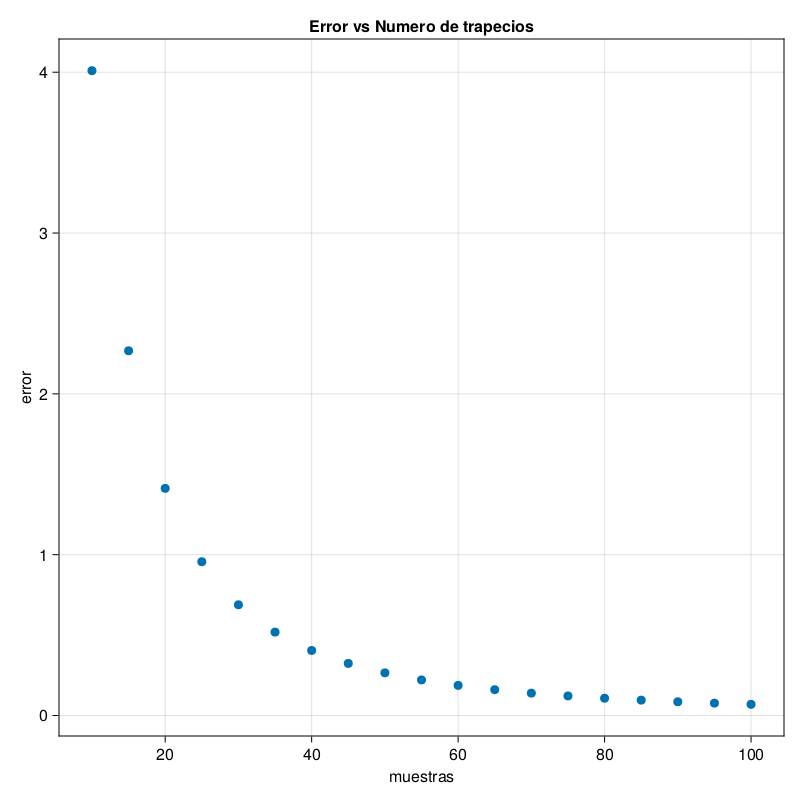

In [134]:
x = [10:5:100;]
scatter(x,datos_error;
    figure = (; resolution = (800, 800)),
    axis = (;title = "Error vs Numero de trapecios",xlabel="muestras", ylabel="error"))